<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
print(df)


       age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]


In [0]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [0]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [0]:
df=df.apply(LabelEncoder().fit_transform)




In [0]:
df=df.dropna()
n_bins=20
xdf=df.copy()
xdf.drop('y',axis= 1, inplace=True)

print(xdf)
outcomes=["y"]

ydf=df[outcomes].copy()

print(ydf)

#vlaues of x and y
X=xdf.values
Y=ydf.values.T[0]





       age  job  marital  ...  cons.conf.idx  euribor3m  nr.employed
0       39    3        1  ...             16        287            8
1       40    7        1  ...             16        287            8
2       20    7        1  ...             16        287            8
3       23    0        1  ...             16        287            8
4       39    7        1  ...             16        287            8
...    ...  ...      ...  ...            ...        ...          ...
41183   56    5        1  ...              0        171            0
41184   29    1        1  ...              0        171            0
41185   39    5        1  ...              0        171            0
41186   27    9        1  ...              0        171            0
41187   57    5        1  ...              0        171            0

[41188 rows x 20 columns]
       y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[41188 rows x 1 columns]


In [0]:
print(X)

[[ 39   3   1 ...  16 287   8]
 [ 40   7   1 ...  16 287   8]
 [ 20   7   1 ...  16 287   8]
 ...
 [ 39   5   1 ...   0 171   0]
 [ 27   9   1 ...   0 171   0]
 [ 57   5   1 ...   0 171   0]]


In [87]:
clf=RandomForestClassifier(n_estimators=100,max_depth=4)

dummy_clf=DummyClassifier()

scores=cross_val_score(clf,X,Y,cv=10,scoring=make_scorer(acc))

dummy_clf.fit(X,Y)


print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(Y,dummy_clf.predict(X))))


ACC: 0.78 +/- 0.22
Dummy ACC: 0.80


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
df_dummies=pd.get_dummies(df)
del df_dummies["y_no"]
del df_dummies["duration"]

print(df_dummies)



       age  campaign  pdays  ...  poutcome_nonexistent  poutcome_success  y_yes
0       56         1    999  ...                     1                 0      0
1       57         1    999  ...                     1                 0      0
2       37         1    999  ...                     1                 0      0
3       40         1    999  ...                     1                 0      0
4       56         1    999  ...                     1                 0      0
...    ...       ...    ...  ...                   ...               ...    ...
41183   73         1    999  ...                     1                 0      1
41184   46         1    999  ...                     1                 0      0
41185   56         2    999  ...                     1                 0      0
41186   44         1    999  ...                     1                 0      1
41187   74         3    999  ...                     0                 0      0

[41188 rows x 63 columns]


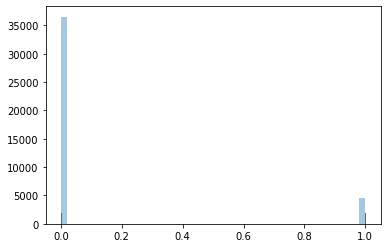

In [0]:
y=df_dummies[['y_yes']].values.T[0]
sns.distplot(y,kde=False,rug=True)

In [96]:
X=xdf.values
Y=y

clf=RandomForestClassifier(n_estimators=1000,max_depth=4)

dummy_clf=DummyClassifier()

scores=cross_val_score(clf,X,Y,cv=10,scoring=make_scorer(acc))

dummy_clf.fit(X,Y)


print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(Y,dummy_clf.predict(X))))


ACC: 0.78 +/- 0.22
Dummy ACC: 0.80


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


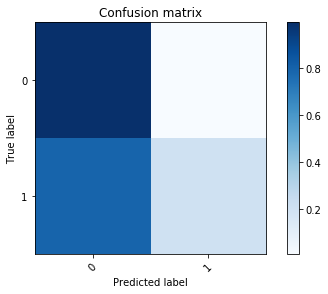

In [95]:
# Compute confusion matrix
clf.fit(X,Y)
Y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(Y, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(Y))), normalize = True,
                      title='Confusion matrix')

#plt.savefig("confusion.png",bbox_inches='tight')
#plt.savefig("confusion.pdf",bbox_inches='tight')

[10 19 18 12 14 15 17 16  8 13  0  7  9 11  4  3  1  2  6  5]
Sampling ranking:
1. duration (0.319505)
2. nr.employed (0.188189)
3. euribor3m (0.147850)
4. pdays (0.092002)
5. poutcome (0.068179)
6. emp.var.rate (0.059899)
7. cons.conf.idx (0.048894)
8. cons.price.idx (0.030777)
9. month (0.016347)
10. previous (0.009600)
11. age (0.007054)
12. contact (0.006262)
13. day_of_week (0.001493)
14. campaign (0.001072)
15. default (0.001052)
16. education (0.000883)
17. job (0.000477)
18. marital (0.000259)
19. loan (0.000118)
20. housing (0.000089)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


(0, 0.5202869038257734)

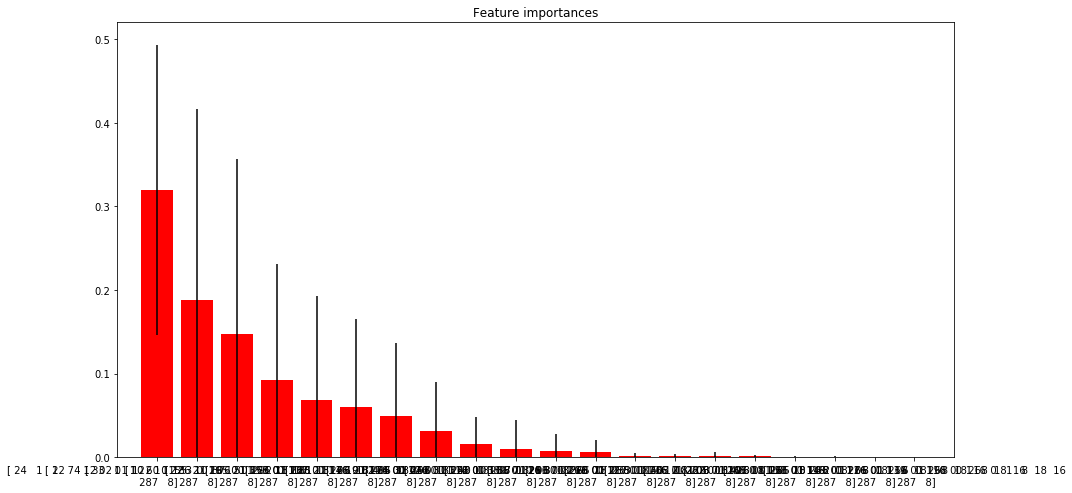

In [108]:
features=list(xdf.columns)
clf.fit(X,Y)
importances = clf.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the Sampling ranking
print("Sampling ranking:")

for f in range(X.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

# plt.savefig("importances.png",bbox_inches='tight')
# plt.savefig("importances.pdf",bbox_inches='tight')